<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 1.5 Hour </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Benigmim Mohammed Yasser
<b> Student 2:</b> Lopez Colombe
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

Follow instructions step by step until the end and submit your complete notebook as an archive (tar -cf groupXnotebook.tar DL_lab1/).
Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by March 20th 2019. 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png" width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [28]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png" width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [29]:
lr = 5.0
x1, x2 = 0.8, 0.2
w1_01, w1_11, w1_21, w1_02, w1_12, w1_22 = 0.2, 0.3, 0.8, -0.4, -0.5, 0.2
w2_01, w2_11, w2_21 = 0.5, -0.6, 0.4
y = 0.4

o1_1 = sigmoid(x1*w1_11+x2*w1_21+w1_01)       # Output of the green neuron
o1_2 = sigmoid(x1*w1_12+x2*w1_22+w1_02)       # Output of the red neuron
o2_1 = sigmoid(o1_1*w2_11+o1_2*w2_21+w2_01)       # Output of the black neuron

print("=== FORWARD PASS 1 ===")
print("o =", o2_1)


dL_u2__1 = 2*(o2_1-y)*dsigmoid(o1_1*w2_11+o1_2*w2_21+w2_01) #partial derivative of the loss wrt activation of the output neuron
# Partial derivatives of the loss wrt weights of the second layer
dL_w2_01 = dL_u2__1*1
dL_w2_11 = dL_u2__1*o1_1
dL_w2_21 = dL_u2__1*o1_2

# Partial derivatives of the loss wrt activation of the hidden neurons
dL_u1__1 = dL_u2__1   *   dsigmoid(x1*w1_11+x2*w1_21+w1_01)   * w2_11
dL_u1__2 = dL_u2__1   *   dsigmoid(x1*w1_12+x2*w1_22+w1_02)  * w2_21
# Partial derivatives of the loss wrt weights of the first layer
dL_w1_01 = dL_u1__1 *  1
dL_w1_11 = dL_u1__1 *  x1
dL_w1_21 = dL_u1__1 *  x2
dL_w1_02 = dL_u1__2 *  1
dL_w1_12 = dL_u1__2 *  x1
dL_w1_22 = dL_u1__2 *  x2

# Weights updates
w1_01 -= lr*dL_w1_01
w1_11 -= lr*dL_w1_11
w1_21 -= lr*dL_w1_21
w1_02 -= lr*dL_w1_02
w1_12 -= lr*dL_w1_12
w1_22 -= lr*dL_w1_22
w2_01 -= lr*dL_w2_01
w2_11 -= lr*dL_w2_11
w2_21 -= lr*dL_w2_21

print("=== BACKWARD PASS ===")
print("w1_01 =", w1_01)
print("w1_11 =", w1_11)
print("w1_21 =", w1_21)
print("w1_02 =", w1_02)
print("w1_12 =", w1_12)
print("w1_22 =", w1_22)
print("w2_01 =", w2_01)
print("w2_11 =", w2_11)
print("w2_21 =", w2_21)

o1_1 = sigmoid(x1*w1_11+x2*w1_21+w1_01)       # Output of the green neuron
o1_2 = sigmoid(x1*w1_12+x2*w1_22+w1_02)       # Output of the red neuron
o2_1 = sigmoid(o1_1*w2_11+o1_2*w2_21+w2_01)       # Output of the black neuron

print("=== FORWARD PASS 2 ===")
print("o =", o2_1)




=== FORWARD PASS 1 ===
o = 0.5597295991095776
=== BACKWARD PASS ===
w1_01 = 0.2540331790269339
w1_11 = 0.3432265432215471
w1_21 = 0.8108066358053868
w1_02 = -0.4341841377344243
w1_12 = -0.5273473101875394
w1_22 = 0.19316317245311515
w2_01 = 0.10637455535192786
w2_11 = -0.8541467506279605
w2_21 = 0.2745727217772572
=== FORWARD PASS 2 ===
o = 0.40648823589210104


<b>Part 2</b>: Neural Network Implementation

In Part 1, you computed weight updates for one sample. This is what we do for the stochastic gradient descent algorithm. However in the rest of the lab, you will be to implement the batch version of the gradient descent.

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [30]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        u_1 = np.matmul(self.input, self.W_input_to_hidden) # Compute activations for the hidden layer
                                                    # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        
        
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        self.o_hidden[:, :-1] = transfer_f(self.u_hidden) # Compute output of hidden
        
        u_2 = np.dot(self.o_hidden, self.W_hidden_to_output)# Compute activations for the output layer
        self.u_output = u_2
        self.o_output = transfer_f(self.u_output) # Compute output of output layer

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [31]:
# First define your neural network ###############
model = NeuralNetwork(2, 2, 1) #biases are added after in the NeuralNetwork.py

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])

Output = 0.5597295991095776


<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [32]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets) # Target outputs
    
        # Compute partial derivative of loss with respect to activations of output layer
        self.dL_du_output = 2*(self.o_output - targets)*transfer_df(self.u_output)
        # Compute partial derivative of loss with respect to activations of hidden layer
        self.dL_du_hidden =   np.dot(self.W_hidden_to_output[:-1],self.dL_du_output.T).T*transfer_df(self.u_hidden) 
       
        # Compute partial derivative of loss with respect to weights
        dW_input_to_hidden = np.matmul(np.transpose(self.input),self.dL_du_hidden)
        dW_hidden_to_output = np.transpose(self.o_hidden)@self.dL_du_output      
       
        # Make updates
        self.W_hidden_to_output -= l*dW_hidden_to_output/len(targets)
        self.W_input_to_hidden -= l*dW_input_to_hidden/len(targets)

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [33]:
# First define your neural network ###############
model = NeuralNetwork(2,2,1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

W_input_to_hidden = [[ 0.34322654 -0.52734731]
 [ 0.81080664  0.19316317]
 [ 0.25403318 -0.43418414]]
W_hidden_to_output = [[-0.85414675]
 [ 0.27457272]
 [ 0.10637456]]
Output = [[0.40648824]]


Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

<div class="alert alert-success">
    <ul>
    <b>
We get the same 2 output values for both implementation so everything seems fine.
    </b>
</ul>
</div>

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [34]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])


Loading MNIST data .....
Done.


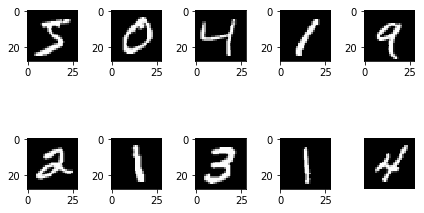

In [35]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [36]:
# Define your neural network
mnist_model = NeuralNetwork(784,30,10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

lr=0.1
Training time: 21.370633125305176


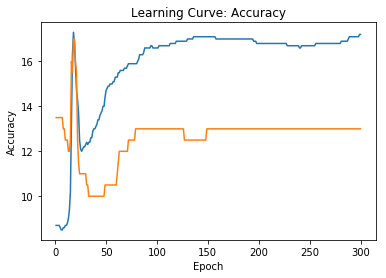

1570

In [37]:
# Train NN and print accuracy on test data
# Learning rate 0.1
# print(mnist_model.input.shape)
# print(mnist_model.W_input_to_hidden)
print("lr=0.1")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=0.1)
mnist_model.predict(test_data)

lr=1.0
Training time: 21.657706260681152


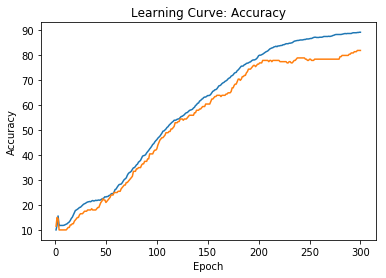

8378

In [38]:
# Learning rate 1.0.
print("lr=1.0")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=1.0)
mnist_model.predict(test_data)

lr=10
Training time: 21.2297785282135


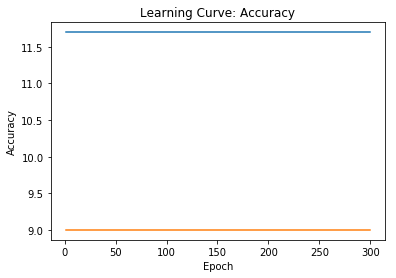

1028

In [39]:
# Learning rate 10.
print("lr=10")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=10)
mnist_model.predict(test_data)

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

lr=0.1, number of hidden neurons=15
Training time: 20.503649711608887


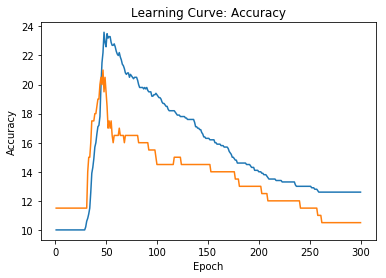

1254

In [40]:
# 15 hidden neurons 
# Define your neural network
mnist_model = NeuralNetwork(784,15,10)
# Learning rate 0.1
print("lr=0.1, number of hidden neurons=15")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=0.1)
mnist_model.predict(test_data)

lr=1.0, number of hidden neurons=15
Training time: 20.279846668243408


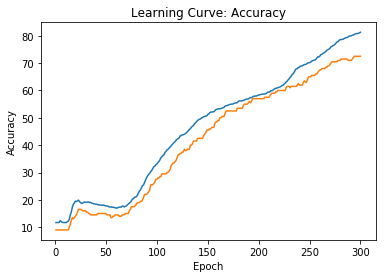

7582

In [41]:
# Learning rate 1.0.
print("lr=1.0, number of hidden neurons=15")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=1.0)
mnist_model.predict(test_data)

lr=10, number of hidden neurons=15
Training time: 20.454336166381836


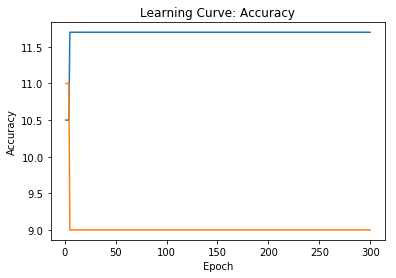

1028

In [42]:
# Learning rate 10.
print("lr=10, number of hidden neurons=15")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=10)
mnist_model.predict(test_data)

lr=0.1, number of hidden neurons=75
Training time: 23.985036611557007


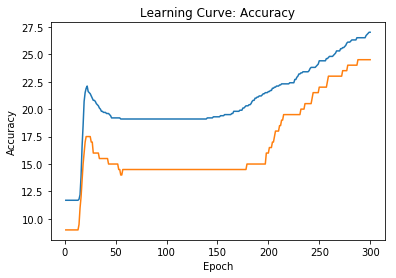

2556

In [43]:
# 75 hidden neurons
# Define your neural network
mnist_model = NeuralNetwork(784,75,10)
# Learning rate 0.1
print("lr=0.1, number of hidden neurons=75")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=0.1)
mnist_model.predict(test_data)

lr=1.0, number of hidden neurons=75
Training time: 24.277366161346436


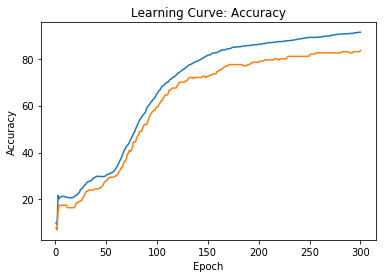

8480

In [44]:
# Learning rate 1.0.
print("lr=1.0, number of hidden neurons=75")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=1.0)
mnist_model.predict(test_data)

lr=10, number of hidden neurons=75
Training time: 24.256314992904663


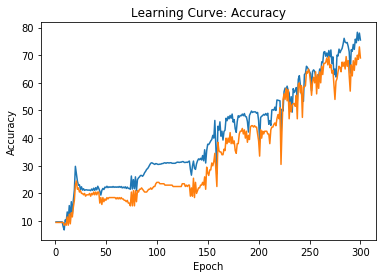

6905

In [45]:
# Learning rate 10.
print("lr=10, number of hidden neurons=75")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=10)
mnist_model.predict(test_data)

<b>Question 2.1.3</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

lr=0.1, number of hidden layers=30
Training time: 1.6592750549316406


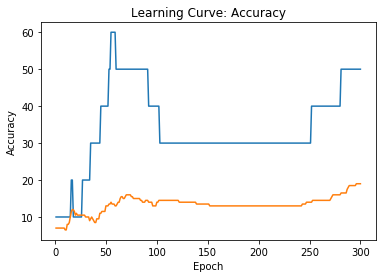

1662

In [46]:
# Train NN and print accuracy on test data
# 30 hidden neurons
# Define your neural network
mnist_model = NeuralNetwork(784,30,10)
# Learning rate 0.1
print("lr=0.1, number of hidden layers=30")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=0.1)
mnist_model.predict(test_data)

lr=1.0, number of hidden layers=30
Training time: 1.7596473693847656


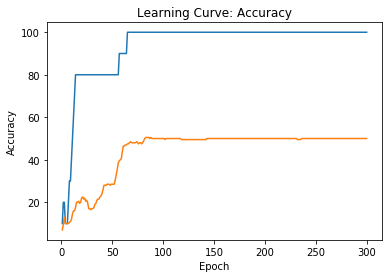

4919

In [47]:
# Learning rate 1.0.
print("lr=1.0, number of hidden layers=30")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=1.0)
mnist_model.predict(test_data)

lr=10, number of hidden layers=30
Training time: 1.8081188201904297


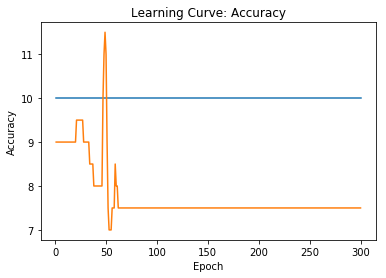

861

In [48]:
# Learning rate 10.
print("lr=10, number of hidden layers=30")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=10)
mnist_model.predict(test_data)

lr=0.1, number of hidden layers=15
Training time: 1.7884769439697266


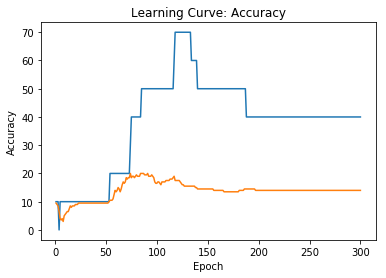

1254

In [49]:
# 15 hidden neurons 
# Define your neural network
mnist_model = NeuralNetwork(784,15,10)
# Learning rate 0.1
print("lr=0.1, number of hidden layers=15")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=0.1)
mnist_model.predict(test_data)

lr=1.0, number of hidden layers=15
Training time: 1.643547534942627


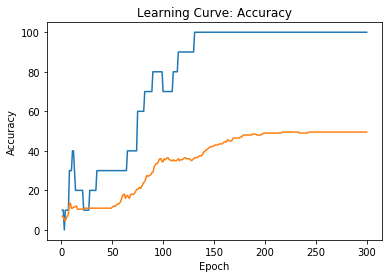

4690

In [50]:
# Learning rate 1.0.
print("lr=1.0, number of hidden layers=15")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=1.0)
mnist_model.predict(test_data)

lr=10, number of hidden layers=15
Training time: 1.579401969909668


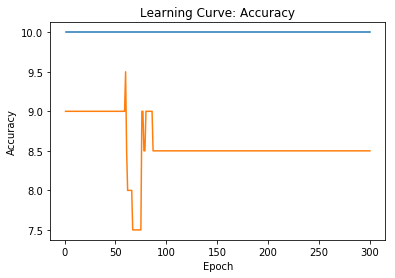

1021

In [51]:
# Learning rate 10.
print("lr=10, number of hidden layers=15")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=10)
mnist_model.predict(test_data)

lr=0.1, number of hidden layers=75
Training time: 1.9441320896148682


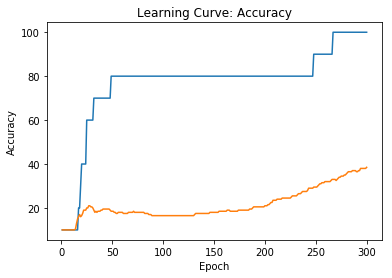

3717

In [52]:
# 75 hidden neurons
# Define your neural network
mnist_model = NeuralNetwork(784,75,10)
# Learning rate 0.1
print("lr=0.1, number of hidden layers=75")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=0.1)
mnist_model.predict(test_data)

lr=1.0, number of hidden layers=75
Training time: 1.935941457748413


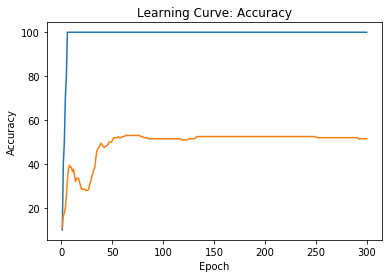

5074

In [53]:
# Learning rate 1.0.
print("lr=1.0, number of hidden layers=75")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=1.0)
mnist_model.predict(test_data)

lr=10, number of hidden layers=75
Training time: 1.919572353363037


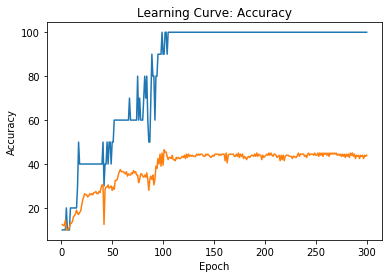

4207

In [54]:
# Learning rate 10.
print("lr=10, number of hidden layers=75")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=10)
mnist_model.predict(test_data)

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

<div class="alert alert-success">
    <h1>Answer</h1>
<ul>
    
<h4>Question 2.1.2 </h4>
    
<b>
       When the learning rate is very low, we are sure, with enough iterations, that we won't miss the minimum (local). However, it takes more time to reach it because the size of the steps are very small. If the number of iterations is not big enough, we may not find the minimum before the end of the iterations. <br />
    This is the case here when lr=0.1. We can see the accuracy still fluctuating and not even reaching 20% at the end of the iterations.<br /><br />
    When the learning rate is too high (lr=10), the minimum can be missed. Indeed, the steps towards the minimum are very high, which makes the model not sensible enough, so we may get stuck in a local minimum and arrive in a sub optimal set of weights.<br />
    This is the case here when lr=10, where the accuracy doesn't even increase but remains equal to 9% on validation data.<br /><br />
    We may conclude that we need to find a good tradeoff for the values of the learning rate to be the closest as possible to the minimum in a fair number of iterations. <br />
    This is the case here when lr=1. We have a nice curve of accuracy that increases during the iterations, and the accuracy reaches around 80% on validation data. We can also see that the overfitting starts when we reach the 200 iterations. <br /><br />
    
</b>
<h4>Question 2.1.3</h4> <br>
<b>
    After training our neural network with the same conditions in Question 2.1.2, we make the following observations :<br /><br />
    1 - The more hidden neurons we have, the longest it takes to compute the results :<br />
        Hidden neurons = 15  implies a training time ~ 19s<br />
        Hidden neurons = 30  implies a training time ~ 20s<br />
        Hidden neurons = 75  implies a training time ~ 23s<br /><br />
    2 - Case when the number of hidden neurons is equal to 15.<br /><br />
    We have a very low number of hidden neurons. Here, the neural network does not have the capacity to learn enough the underlying patterns to be able to  distinguish the digits between 0 and 9 effectively.<br />
       We can see this when the learning rate is equal to 1. The accuracy still goes up but doesn't reach a very high value compared to when the number of hidden neurons was equal to 30.<br />
        The effects of the learning rate values developped in Question 2.1.2 remain the same : we have a very bad accuracy when it's equal to 10 and even worse when it's equal to 0.1.<br /><br />
    3 - Case when the number of hidden neurons is equal to 75.<br /><br />
    We have a very high number of hidden neurons. In this case, a problem we may encounter is that some neurons may not be very efficient to make the classification. Therefore, we will have more complexity because of some extra neurons that doesn't contribute enough.<br />
    When the learning rate is equal to 0.1, we can see that the accuracy still goes up compared to when we had 15 neurons. The large number of neurons enables to make the accuracy progress continuously without decreasing for a long time. This is because some of the 75 neurons will help the loss function to not stay for a long time in a local minimum and always decrease.<br />
    When the learning rate is equal to 1, we see that the accuracy increases but the curve starts to take a very slow progress from iteration ~ 170. This is because we have too many neurons and they start to not contribute enough to train the model.<br />
    However, we got an accuracy nearly equal to 82% which is still better than when we had only 15 neurons (~ 72%).<br />
    With the very high learning rate equal to 10, we see that the accuracy continues to goes up even if it is fluctuating a lot. The reason is that with a high number of neurons, during the training phase, they "compensate" each other, and all the "big steps" are averaged to give a normal step in the end.<br /><br />
4 - One of the techniques that helps us to make our neural network smaller, fast and efficient is <b>Pruning</b>.<br />
When we have a lot of hidden layers, as in the case of 75 hidden neurons, we may have some neurons that doesn't contribute enough, so the solution is to do a ranking of the neurones and remove the ones with the lowest rank, one by one.<br />
There are lot of methods of ranking :mean activations, number of times a neuron wasn't equal to zero on some validation set, and so on and so forth...<br /><br />
5 - To improve a neural network, we can also modify some hyper paramaters :<br />
    <b>Learning rate decay : </b> This technique is based on the fact that generally, a learning rate should decrease as we are getting closer to the target.<br />
    The technique is to decrease the learning rate while the epochs increases. Thus, we allow for big steps to happen at the beginning and we reduce them as we go forward, by adjusting decreasingly the learning rate so that we convergence to the global minimum quickly.<br />
    <b>Momentum : </b> Sometimes we may get stuck in a local minimum, the momentum hyperparameter helps us to avoid it. The idea is to compute the weighted average of the previous steps so that we can have a slightly bigger step and overcome the local minimum.
    
</b>
<h4>Question 2.1.4</h4> <br>
<b>   When we do the training on the very small training dataset, the system overfits very fast and therefore does not generalize well ; No matter the learning rate value or the number of hidden neurons, after a number of iterations the system gets stuck in a very bad local minimum on the validation data.<br />
    The accuracy on training data usually gets up to 100% easily when the conditions are not very bad (lr=10 and 15 hidden neurons) because we don't have a very big number of samples in the very small training data (=10).<br />
</b>
    
</ul>
</div>

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

<div class="alert alert-success">
    <h1>Answer</h1>
<ul>
<b>Performance depends on the result on test data.<br>
    Thus, regarding the number displayed under each chart -which corresponds to the accuracy on test data- to get the best result as possible, we choose :
    <ul>learning_rate=1.0.</ul>
    <ul>number of hidden layers=75.</ul>
    </b>
    </ul>
</div>

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training time: 1618.4477288722992


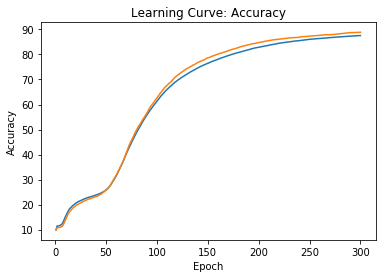

43782

In [55]:
mnist_model = NeuralNetwork(784,75,10)
mnist_model.weights_init()
mnist_model.train(training_data,validation_data,iterations=300,learning_rate=1.0)
mnist_model.predict(training_data)

<div class="alert alert-success">
    <h1>Answer</h1>
<ul>
<b>The result is very good : we get 90% accuracy on training and validation data. Furthermore, the result on test data is high.
    The model has a very good performance.
    </b>
    </ul>
</div>

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

<div class="alert alert-success">
    <h1>Answer</h1>
<ul>
<h4>$\frac{\partial L_{xe}}{\partial u_i}$ = $o_i-t_i$ </h4><br>
<BR>Because:
<br>
$\frac{\partial L_{xe}}{\partial u_i}$ = $\frac{\partial L_{xe}}{\partial o_j}$$\frac{do_j}{du_i}$ + 0<br>
    <BR>
$\frac{\partial L_{xe}}{\partial o_j} = - \sum_{k=1}^n \frac{t_k}{o_j}$<br>
    <BR>
$\frac{do_j}{du_i}$ = $o_i(Kronecker_ij-o_j)$<br>
    <BR>
$\frac{dt_i}{du_i}$ = 0
</ul>
</div>

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [ ]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        #pass  
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        
        self.input = np.array(inputs)
        u_1 = np.matmul(self.input, self.W_input_to_hidden)
        
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1))
        self.o_hidden[:, :-1] = transfer_f(self.u_hidden)
        
        
        u_2 = np.dot(self.o_hidden, self.W_hidden_to_output)
        self.u_output = u_2
        self.o_output = softmax(self.u_output) #line which changed from the previous section
        

    def backpropagate_xe(self, targets, learning_rate=5.0):
        #pass
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets)
    
        self.dL_du_output = self.o_output - targets #line which changed from the previous section
        dW_hidden_to_output = np.transpose(self.o_hidden)@self.dL_du_output
        
        self.dL_du_hidden =   np.dot(self.W_hidden_to_output[:-1],self.dL_du_output.T).T*transfer_df(self.u_hidden)     
        dW_input_to_hidden = np.matmul(np.transpose(self.input),self.dL_du_hidden)
        
        self.W_hidden_to_output -= l*dW_hidden_to_output/len(targets)
        self.W_input_to_hidden -= l*dW_input_to_hidden/len(targets)

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

In [ ]:
# Define your neural network
mnist_model_xe = NeuralNetwork(784,30,10)
# Train NN and print accuracy on validation data
mnist_model_xe.weights_init()
mnist_model_xe.train_xe(small_training_data,small_validation_data,iterations=300,learning_rate=1.0)

In [ ]:
# Print accuracy on test data
mnist_model.predict(test_data)

<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

In [ ]:
# as a reminder
# 30 hidden neurons
mnist_model = NeuralNetwork(784,30,10)
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=1.0)
mnist_model.predict(vsmall_training_data)

<div class="alert alert-success">
    <h1>Answer</h1>
<ul>
    <b>
    We are in the case where the number of hidden layers is 30 and the learning_rate is 1.0.<br>
    The MSE is faster than the cross entropy algoritm.<br>
    The cross-entropy loss gives a better result than the MSE loss for training, validation and test data.<br>
    Indeed, the softmax function takes into consideration every output neurons. The sum of the output values has to be equal to one so if the probability of an output neuron increases, the other output values decrease and this digs wider the gap between the output neuron values.
        Thanks to that, the cross-entropy loss decreases and the weights tend to change in a more granular way (making the algorithm more accurate).<br>
        The MSE loss emphasises a lot incorrect outputs but doesn't the output value to the other outputs which leads to modify weights less precisely.
    </b>
</ul>
</div>

<div align="center"><b>THE END!</b>